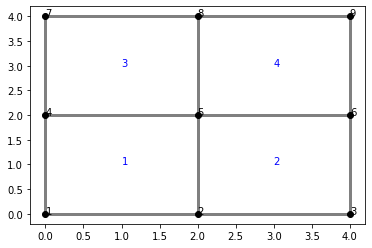

[[0. 0.]
 [2. 0.]
 [4. 0.]
 [0. 2.]
 [2. 2.]
 [4. 2.]
 [0. 4.]
 [2. 4.]
 [4. 4.]]
[[1 2 5 4]
 [2 3 6 5]
 [4 5 8 7]
 [5 6 9 8]]


NameError: name 'GalerkinResult' is not defined

In [5]:
#Archivo donde se llama a la funcion galerkin y se hacen pruebas numericas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Mesh import * #Archivo donde esta la función para generar malla y para graficar
from sympy import integrate, linear_eq_to_matrix, symbols,simplify,collect,  diff, Eq, Matrix
from sympy import *
from GalerkinFuntion import *
from GalerkinFunRect import *

from numpy import *
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns



  #print(matrixCalor)

  # plt.imshow(matrixCalor, cmap='hot', interpolation='nearest')
  # plt.show()
#from GalerkinFuntionNormalizado import *

l = 4 #Distancia en x
#l=symbols('l')
w = 4 #Distancia en y
#w=symbols('w')
p = 2  #Divisiones en x
m = 2  #Divisiones en y

#Definicion de condiciones iniciales

#kx=symbols('kx')
kx=1.2 #k conductividad en y
#ky=symbols('kx')
ky=1.2 #k conductividad en X

#Para caso donde la superficie es fuente de calor
#h=symbols('h')
h=20 #h Coeficiente de conveccion h=-20
#Tf=symbols('Tf')
Tf=30 #Tf Temperatura del aire  Tf=100
#q=symbols('q')
q=1000 #q Flujo especifico de calor Vatios/m3   q=-100 


elemLength = l/p #Largo del elemento
elemWidth = w/m  #Ancho del elemento
tipoDeElemento = 'CUADRADO' #Puede ser elemento tipo 'TRIANGULO' o 'CUADRADO'
listaLadosConv=[True,True,True,True] #Lados i-j, j-m, m-n, n-i Lista con lados con conv


#Se genera la lista NL ("Node list") que contiene las coordenadas de cada nodo
#y EL("Element list") que contiene la lista de nodos de cada elemento
NL,EL = uniform_mesh(l, w, p, m, tipoDeElemento) # Generar malla
graph_mesh(tipoDeElemento,NL,EL) #Graficar malla

print(NL)
print(EL)
#galerkinMethodRect retorna un dataframe por elemento
dataFrameList = []  #Se juntan las dataframe de cada elemento en una lista dataFrameList
for i in range (0, len(EL)):
    dataFrameList.append(galerkinMethodRect(elemLength, elemWidth, NL, EL, h, Tf, kx, ky, q, i,l,w, listaLadosConv ))
#print(dataFrameList)

matrixCalor = GalerkinResult(dataFrameList) #GalerkinResult organiza, combina y reduce los dataframes, los convierte en matrices 
#y se encuentra la solución al sistema de ecuaciones que se guarda en una matriz solución (matrixCalor)
ax = sns.heatmap(matrixCalor, linewidth=0.5,cmap="jet")
plt.show()